In [10]:
# Code for transient 1D convection. 

%matplotlib notebook
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Define problem parameter:
c = 2 # Wave speed

# Define gird params:
nx = 51; xmin = 0.; xmax = 10.
x = numpy.linspace(xmin,xmax,nx);
dx = (xmax-xmin)/(nx-1);
u0 = numpy.zeros(nx);

#Define time parameters:
dt = 0.1; Ntime = 100; time = 0.
sigma = c*dt/dx;

print(sigma)

# Define initial conditions
for i in range (nx):
    if (x[i] >= 2.0 and x[i] < 4.0):
        u0[i] = 1;


1.0


<IPython.core.display.Javascript object>


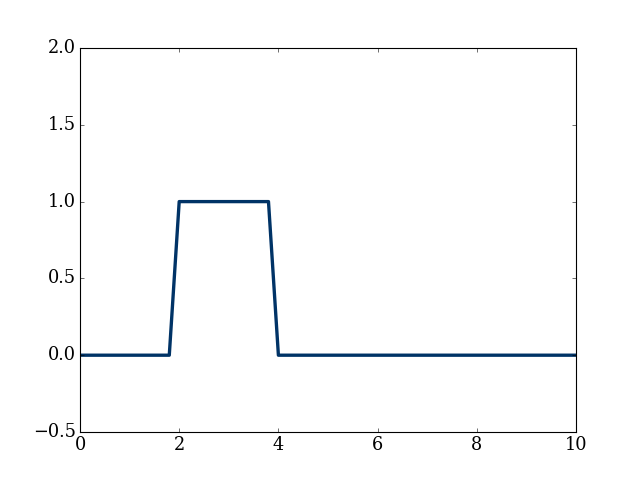

In [11]:
pyplot.figure();
pyplot.plot(x, u0, color='#003366', ls='-', lw=3)
pyplot.ylim(-0.5,2);

In [12]:
# Using forward time, backward space (1st Order in space and time)
uFD = numpy.copy(u0);
unew = numpy.copy(u0);

uFDP = numpy.zeros((Ntime,nx));

for iter in range (Ntime):
    for i in range (1, nx):
        unew[i] = uFD[i] - dt/dx*(uFD[i]-uFD[i-1])*c;
    unew[0] = unew[-1];
    uFD = numpy.copy(unew);
    uFDP[iter][:] = numpy.copy(unew);
    time = time + dt;
    

<IPython.core.display.Javascript object>


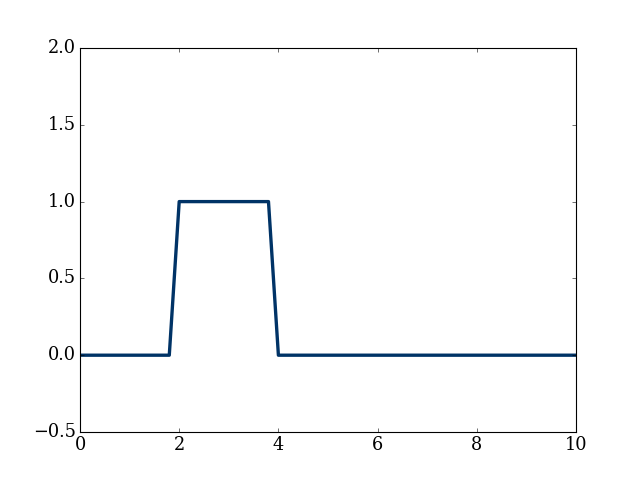

In [13]:
pyplot.figure();
pyplot.plot(x, unew, color='#003366', ls='-', lw=3)
pyplot.ylim(-0.5,2);

In [14]:
# Using forward time, backward space compact (2nd Order in space and 1st order in time)
uCFD = numpy.copy(u0);
ucnew = numpy.copy(u0);

dt = dt/2;

uCFDP = numpy.zeros((Ntime,nx));
dudx = numpy.zeros_like(uCFD);
dudx2 = numpy.copy(dudx)

for iter in range (Ntime):
    #Compute derivatives:
    dudx[0] = dudx[nx-1];
    dudx[1:] = 0.
    dudx[1:] = 2/dx*(uCFD[1:]-uCFD[:-1]) - dudx[:-1];
    
    for i in range (1, nx):
        ucnew[i] = uCFD[i] - dt*dudx[i]*c;
    ucnew[0] = ucnew[-1];
    uCFD = numpy.copy(ucnew);
    uCFDP[iter][:] = numpy.copy(ucnew);


<IPython.core.display.Javascript object>


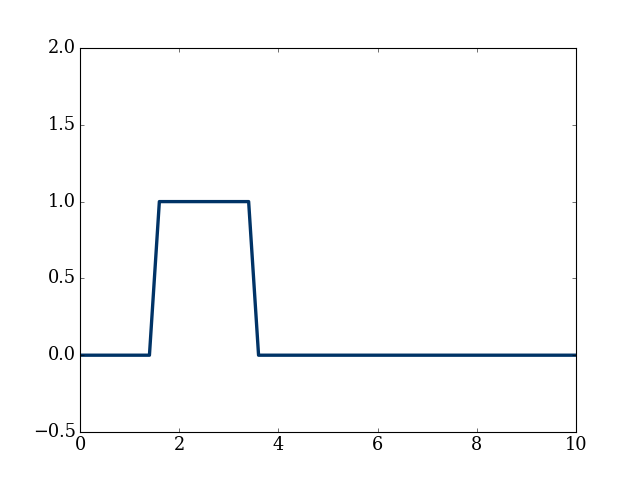

In [15]:
pyplot.figure();
pyplot.plot(x, ucnew, color='#003366', ls='-', lw=3)
pyplot.ylim(-0.5,2);

<IPython.core.display.Javascript object>


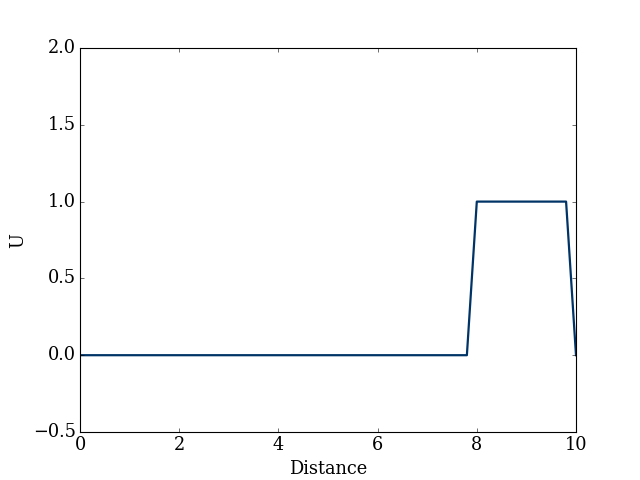

In [16]:
from matplotlib import animation
#from JSAnimation.IPython_display import display_animation

def animate(data):
    x = numpy.linspace(0,10,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,10),ylim=(-0.5,2),xlabel=('Distance'),ylabel=('U'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=uFDP, interval=Ntime)
#display_animation(anim, default_mode='loop')